In [88]:
# Imports
import os
import numpy as np
from astropy.table import Table

# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times New Roman"
%matplotlib inline
#%matplotlib notebook
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = [r'\usepackage{amsmath} \usepackage{bm} \usepackage{physics}']
%config InlineBackend.figure_format = 'retina' # For high quality figures
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [89]:
data_folder = "data-2019-09-23-nickel-joey-anne"

In [90]:
ngc6819_v_tab = Table.read(os.path.join(data_folder, 'photometry/ngc6819_v.dat'), format='ascii')
ngc6819_b_tab = Table.read(os.path.join(data_folder, 'photometry/ngc6819_b.dat'), format='ascii')

ngc6819_v_pd = ngc6819_v_tab.to_pandas()
ngc6819_b_pd = ngc6819_b_tab.to_pandas()

## Sorting by x_0 value does a good job of aligning the indices between the two tables

In [92]:
print("Number of source pairs with x_0 location not within tolerance: {}".format(
    len(ngc6819_v_pd) - 
    np.sum(np.isclose(ngc6819_v_pd.sort_values('x_0')['x_0'], 
                      ngc6819_b_pd.sort_values('x_0')['x_0'], 
                      rtol=1e-1))))

Number of source pairs with x_0 location not within tolerance: 1


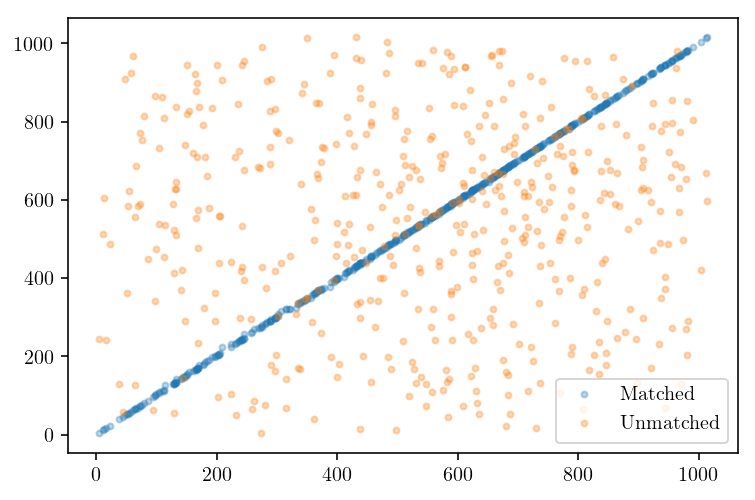

In [93]:
fig, ax = plt.subplots()
ax.plot(ngc6819_v_pd.sort_values('x_0')['x_0'], ngc6819_b_pd.sort_values('x_0')['x_0'], '.', 
        alpha=0.3, label='Matched')
ax.plot(ngc6819_v_pd['x_0'], ngc6819_b_pd['x_0'], '.', alpha=0.3, label='Unmatched')
ax.legend()

plt.show()

In [94]:
# Save the sorting
ngc6819_v_pd = ngc6819_v_pd.sort_values('x_0')
ngc6819_b_pd = ngc6819_b_pd.sort_values('x_0')

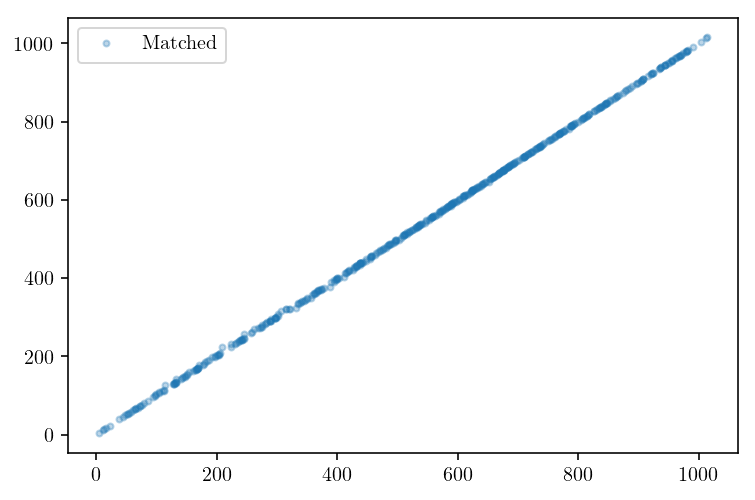

In [95]:
fig, ax = plt.subplots()
ax.plot(ngc6819_v_pd['x_0'], ngc6819_b_pd['x_0'], '.', alpha=0.3, label='Matched')
ax.legend()

plt.show()

In [96]:
# Convert back to astropy Tables
ngc6819_v_tab = Table.from_pandas(ngc6819_v_pd)
ngc6819_b_tab = Table.from_pandas(ngc6819_b_pd)

In [97]:
# Save these matched tables
overwrite = True

ngc6819_v_tab.write(os.path.join(data_folder, 'photometry/ngc6819_v_matched.dat'), format='ascii', overwrite=True)
ngc6819_b_tab.write(os.path.join(data_folder, 'photometry/ngc6819_b_matched.dat'), format='ascii', overwrite=True)